In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [11]:
import tensorflow as tf
tf.random.set_seed(1234)
np.random.seed(1234)

In [12]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal  #Xavier

In [13]:
import os
base_path = "./catdog/cat"
img_path_list = os.listdir(base_path)[:5]
print(img_path_list)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']


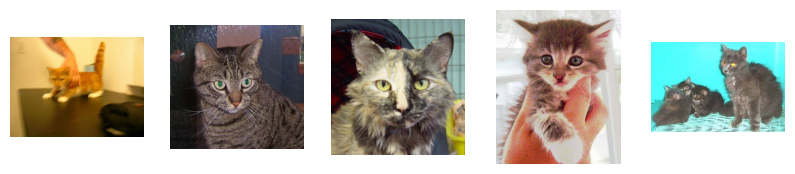

In [14]:
import matplotlib.image as pltimg
plt.figure(figsize=(10,2))

for i, fname in enumerate(img_path_list):
    plt.subplot(1, len(img_path_list), i+1)
    img = pltimg.imread(os.path.join(base_path, fname))
    plt.imshow(img)
    plt.grid(False)
    plt.axis('off')

In [ ]:
(X_train,y_train), (X_val,y_val) = mnist.load_data()
X_train.shape, y_train.shape, X_val.shape, y_val.shape

In [ ]:
model = Sequential()
# ------------- CNN ---------------------
model.add(Conv2D(filters=16, input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1), padding='valid', activation='relu', kernel_initializer='glorot_uniform')  )
model.add(MaxPool2D(pool_size=(2, 2),                               strides=None  , padding="valid"))
model.add(Conv2D(filters=24, kernel_size=(5,5), activation='relu' ) )
model.add(MaxPool2D(pool_size=(2, 2) ))

# ------------- Fully Connected ---------
model.add(Flatten())

model.add(Dense(units=60,  activation='relu'))              #히든레이어
model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])